#Import Cleaned Data

In [2]:
import pandas as pd
from io import StringIO
from bs4 import BeautifulSoup as bs
import requests
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
PR_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/CleanedData.csv')
PR_df.head()

,Date,Member,Party,State / District,Title,Press Release,Caucus,Proccessed Press Release
0,May 8,Kevin McCarthy,R,Calif.-20,Speaker Johnson: Americans Should Decide Ameri...,FOR IMMEDIATE RELEASE | Contact: Olivia Porcar...,NaN,immediate release contact olivia porcaro past ...
1,May 6,Tom Cole,R,Okla.-4,The Far-Lefts Serious Anti-Israel Problem,"May is Asian American, Native Hawaiian, and Pa...",NaN,may asian american native hawaiian pacific isl...
2,May 6,Gus Bilirakis,R,Fla.-12,Financial Disclosure Pasco County Utilities Pr...,"""It is unconscionable that President Biden is ...",NaN,unconscionable president biden holding arm shi...
3,May 6,Gus Bilirakis,R,Fla.-12,Hernando Sheriff Project Financial Disclosure,"Washington, DC – House Democratic Leader Hakee...",NaN,washington dc house democratic leader hakeem j...
4,May 6,Gus Bilirakis,R,Fla.-12,Hernando Schools Financial Disclosure,"May 8, 2024 Contact: Taylor Haulsee “Never A...",NaN,may contact taylor haulsee never honor day rem...


#TF-IDF

In [6]:
from sklearn.model_selection import train_test_split

X_train, x_val, y_train, y_val = train_test_split(PR_df['Press Release'], PR_df['Party'], test_size=0.2, stratify=PR_df['Party'])
print(f'Training samples: {len(X_train)}')
print(f'Validation samples: {len(x_val)}')

Training samples: 768
Validation samples: 192


In [7]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)

y_train_ohe = ohe.fit_transform(y_train.values.reshape(-1, 1))
y_val_ohe = ohe.transform(y_val.values.reshape(-1, 1))

print(f'One hot encoded training labels shape: {y_train_ohe.shape}')
print(f'One hot encoded validation labels shape: {y_val_ohe.shape}')

One hot encoded training labels shape: (768, 3)
One hot encoded validation labels shape: (192, 3)


In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_le = label_encoder.fit_transform(y_train)
y_val_le = label_encoder.transform(y_val)

print(f'Label encoded training labels shape: {y_train_le.shape}')
print(f'Label encoded validation labels shape: {y_val_le.shape}')

Label encoded training labels shape: (768,)
Label encoded validation labels shape: (192,)


In [9]:
for i in range(5):
    print(f'Original label: {y_train.iloc[i]} - Label encoded: {y_train_le[i]}')

Original label: R - Label encoded: 2
Original label: R - Label encoded: 2
Original label: D - Label encoded: 0
Original label: R - Label encoded: 2
Original label: R - Label encoded: 2


In [10]:
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [12]:
text_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', SVC(kernel='linear', C=1.0, random_state=42))
])

# fit the model
text_clf.fit(X_train, y_train_le)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', SVC(kernel='linear', random_state=42))])

In [13]:
text_clf.score(x_val, y_val_le)

0.6458333333333334

#RNN - On Document

In [14]:
import random

# sample a random sentence from the training set
random_idx = random.randint(0, len(X_train))
print(f'Random Document: {X_train.iloc[random_idx]}')
print(f'Author: {y_train.iloc[random_idx]}')

Random Document: Today, U.S. Representatives Scott Perry (PA-10), Thomas Massie (KY-04), Mary Miller (IL-15), and Andy Ogles (TN-05) introduced the No Propaganda Act to defund the biased Corporation for Public Broadcasting (CPB). The organization and its subsidiaries are staffed by extreme liberals, including the newly appointed divisive CEO of the National Public Radio (NPR) who has openly campaigned for Joe Biden.  “The American Taxpayer is footing the bill for a woke media corporation that pretends to be impartial while pushing Chinese propaganda,” said Rep. Perry. “CPB cannot be allowed to keep using your hard-earned tax dollars to push a biased and political agenda that goes against what’s best for Americans.” Claiming to be unbiased and serving in the best interest of the public, the CPB funds content that incorporates woke and divisive messaging. A whistleblower, and 25-year veteran of NPR, recently called out NPR for allowing its “pro-Democrat political leanings to seep into ed

In [15]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)

y_train_ohe = ohe.fit_transform(y_train.values.reshape(-1, 1))
y_val_ohe = ohe.transform(y_val.values.reshape(-1, 1))

print(f'One hot encoded training labels shape: {y_train_ohe.shape}')
print(f'One hot encoded validation labels shape: {y_val_ohe.shape}')

One hot encoded training labels shape: (768, 3)
One hot encoded validation labels shape: (192, 3)


In [16]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# Create a TextVectorization layer
text_vectorizer = TextVectorization(
    max_tokens=8000,  # Maximum size of the vocabulary
    output_mode='int',          # Output the token indices as integers
    output_sequence_length=600,  # Length of output sequences
    pad_to_max_tokens=True      # Pad sequences to max_tokens
)

In [17]:
# Randomly visualize some of your vectorized textual data
import random

text_vectorizer.adapt(X_train.values)

example_sent = random.choice(X_train.values)
print(f'Original text:\n{example_sent}')
print(f'\nVectorized text:\n{text_vectorizer([example_sent])}')
print('Length of vector:', len(text_vectorizer([example_sent]).numpy()[0]))

Original text:

Reference ID: 18.d83a2217.1715273183.7541945
 
You can proceed to www.senate.gov.

If this problem persists, please contact the Office of the Secretary Webmaster at webmaster@sec.senate.gov.

 
If this problem persists, please contact the Office of the Secretary Webmaster at webmaster@sec.senate.gov.

 


Vectorized text:
[[70 65  1 21 31 71  3 69 25 10 35 41 26 27  2 17  5  2 29 40 14 39 25 10
  35 41 26 27  2 17  5  2 29 40 14 39  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 

In [18]:
vocab = text_vectorizer.get_vocabulary()
print(f'Number of words in the vocabulary: {len(vocab)}')
print(f'Most common words in the vocabulary: {vocab[:5]}')
print(f'Least common words in the vocabulary: {vocab[-5:]}')

Number of words in the vocabulary: 8000
Most common words in the vocabulary: ['', '[UNK]', 'the', 'to', 'and']
Least common words in the vocabulary: ['minneapolis', 'minister’s', 'minimal', 'mineral', 'mined']


In [19]:
text_vectorizer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'dtype': 'string',
 'batch_input_shape': (None,),
 'max_tokens': 8000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 600,
 'pad_to_max_tokens': True,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 8000}

In [20]:
token_embedding = tf.keras.layers.Embedding(input_dim=len(vocab),
                                            output_dim=128,
                                            mask_zero=True,
                                            name='token_embedding')

print(f'Sentence before vectorization: {example_sent}')
vectorized_sent = text_vectorizer(example_sent)
print(f'Sentence after vectorization: {vectorized_sent}')
embedded_sent = token_embedding(vectorized_sent)
print(f'Sentence after embedding: {embedded_sent}')

Sentence before vectorization: 
Reference ID: 18.d83a2217.1715273183.7541945
 
You can proceed to www.senate.gov.

If this problem persists, please contact the Office of the Secretary Webmaster at webmaster@sec.senate.gov.

 
If this problem persists, please contact the Office of the Secretary Webmaster at webmaster@sec.senate.gov.

 

Sentence after vectorization: [70 65  1 21 31 71  3 69 25 10 35 41 26 27  2 17  5  2 29 40 14 39 25 10
 35 41 26 27  2 17  5  2 29 40 14 39  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [21]:
X_dataset = tf.data.Dataset.from_tensor_slices((X_train.values, y_train_ohe))
val_dataset = tf.data.Dataset.from_tensor_slices((x_val.values, y_val_ohe))

In [22]:
BATCH_SIZE = 15

In [23]:
train_dataset = X_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [24]:
# MODEL Hyperparameters
learning_rate = 0.0001
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate)
loss = 'categorical_crossentropy'
epochs = 8

In [25]:
# Model architecture

from tensorflow.keras import layers, regularizers

inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)

x = token_embedding(x)
x = tf.keras.layers.Flatten()(x)


outputs = layers.Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

In [26]:
history = model.fit(train_dataset, epochs=epochs, validation_data=val_dataset)

Epoch 1/8
52/52 [==============================] - 2s 29ms/step - loss: 0.8380 - accuracy: 0.5508 - val_loss: 0.7845 - val_accuracy: 0.5625
Epoch 2/8
52/52 [==============================] - 1s 26ms/step - loss: 0.7471 - accuracy: 0.7109 - val_loss: 0.7654 - val_accuracy: 0.5521
Epoch 3/8
52/52 [==============================] - 2s 39ms/step - loss: 0.7004 - accuracy: 0.7266 - val_loss: 0.7546 - val_accuracy: 0.5573
Epoch 4/8
52/52 [==============================] - 2s 44ms/step - loss: 0.6615 - accuracy: 0.7617 - val_loss: 0.7480 - val_accuracy: 0.5625
Epoch 5/8
52/52 [==============================] - 2s 36ms/step - loss: 0.6276 - accuracy: 0.7773 - val_loss: 0.7443 - val_accuracy: 0.5625
Epoch 6/8
52/52 [==============================] - 2s 31ms/step - loss: 0.5976 - accuracy: 0.7904 - val_loss: 0.7424 - val_accuracy: 0.5573
Epoch 7/8
52/52 [==============================] - 1s 27ms/step - loss: 0.5704 - accuracy: 0.8047 - val_loss: 0.7416 - val_accuracy: 0.5521
Epoch 8/8
52/52 [===

In [27]:
# plot the training history
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.show()

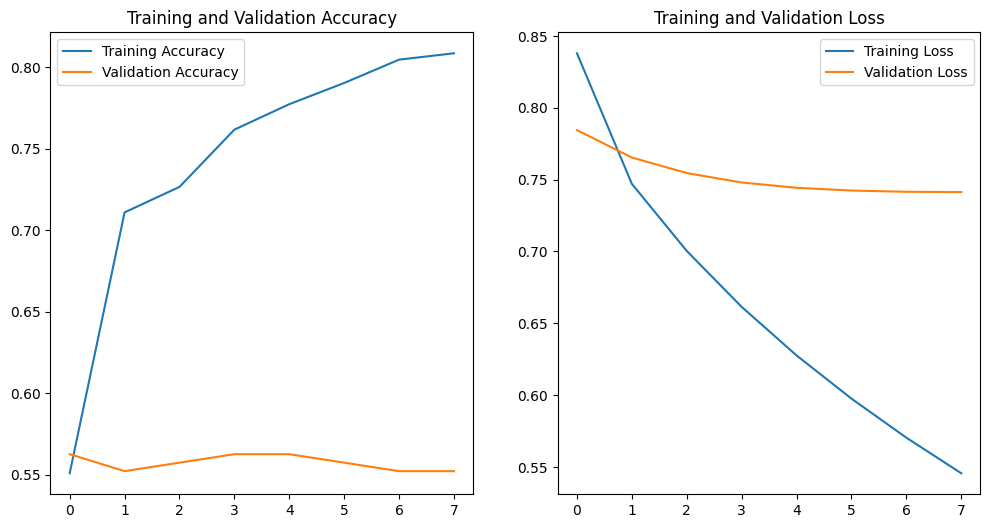

In [28]:
plot_history(history)